# Final Assignment (Scientific computing)

Do not forget to make appropriate use of comments to improve the readability of your code.


## Calculating $\pi$

One way to calculate $\pi$ is to use a Taylor expansion of the arctangent function:

$$
\arctan(x) = \sum_{n=1}^\infty (-1)^n \frac{x^{2n+1}}{2n+1}
$$

Using the fact that $\arctan(1) = \pi/4$, we can find: 

$$
\pi = \sum_{n=0}^\infty (-1)^n \frac{4}{2n+1}
$$

The value $\pi$ rounded to 6 decimal places is 3.141593. 

Write a `while` loop that calculates the number of terms $n$ in the sum above needed to calculate $\pi$ to an accuracy of 6 decimal places.

What do I mean by "to an accuracy of 6 decimal places"? Mathematically, the difference between your calculated result and the real value of $\pi$ should be less than $10^{-6}$.

In [9]:
import numpy as np
# Value of pi
pi = np.pi

# Parameters for the sum s, the number of terms n and the error between the sum and the real value 
s = 0
n = 0
error = 1 #make sure to choose value > 1e-6

while error > 1e-6:
    s += (-1)**n*4/(2*n+1)
    n += 1
    error = abs(pi - s) #make sure to take the absolute value in order to prevent negative values

print(s)
print(pi)
print(n)

3.1415936535887745
3.141592653589793
1000001


# Optimal Throwing Angle

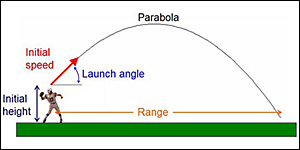

Larry wants to know the optimal angle at which to throw a ball such that it reaches the farthest horizontal distance.
At time $t=0$ s, the ball is thrown at an angle $\alpha$ with the horizontal, with initial (total) velocity $v_i=10$ m/s. The ball is thrown from the origin (0,0), where we simplify the situation by neglecting the height of the person who throws the ball. Moreover, we neglect any friticional effects.
Since the only force acting on the ball is due to gravity, the horizontal position is solely described by the initial horizontal velocity and the time:
$$x = v_x t$$

To get the x-coördinate of the ball when it hits the ground ($y=0$), time $t_f$ must be calculated.

$$y=0=v_y t - \frac{1}{2} g t^2$$

Thus:

$$t_i = 0 \vee t_f = \frac{2v_y}{g}$$

1. Create a function that takes inputs $v_i$ and $\alpha$ and calculates the horizontal distance the ball travels before hitting the ground. 

2. Create an array of 100 values for $\alpha$ ranging from 0 to $\frac{\pi}{2}$ (python calculates angles in radians).

3. Using your function, calculate the distance thrown for each value of $\alpha$, store these distances in an array, and plot them. On the x-axis, display the angle in degrees (as it is more convenient for humas to work with degrees).

4. Print the largest distance achieved and its corresponding angle. (You can use np.argmax() to find the index of the largest value in an array. see: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

Don't forget axis labels (including units)! Also, don't forget to make use of comments to explain your code (briefly!).

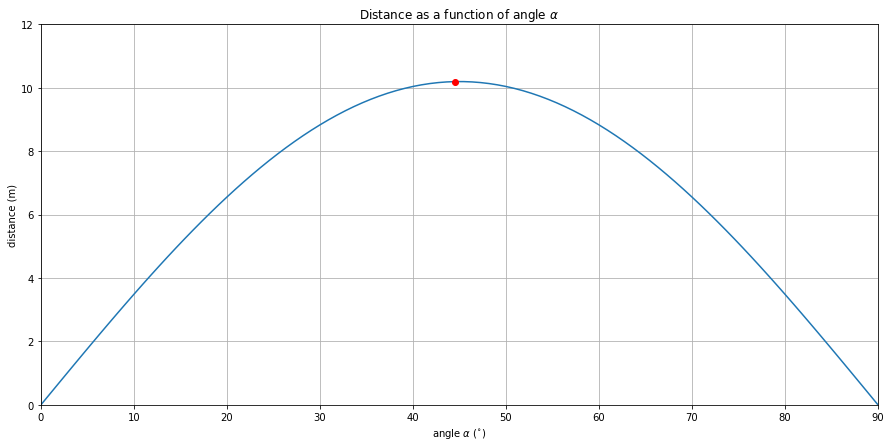

Optimal angle:  44.5 °


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create function
def distance(vi, alpha):
    g = 9.81
    vy = vi*np.sin(alpha)
    vx = vi*np.cos(alpha)
    tf = 2*vy/g
    return vx*tf

# Add parameters and create arrays
vi = 10
alpha = np.linspace(0, np.pi/2, 100)
distance = distance(vi, alpha)

# Calculate xmax
xmax = np.max(distance)
xargmax = np.argmax(distance)
alphamax = alpha[xargmax]

# Create plots
plt.figure(figsize=[15,7])
plt.title(r"Distance as a function of angle $\alpha$")
plt.plot(alpha*180/np.pi, distance, '-')
plt.plot(alphamax*180/np.pi, xmax, 'or')
plt.xlabel(r"angle $\alpha$ $(^{\circ})$")
plt.ylabel("distance (m)")
plt.xlim([0,90])
plt.ylim([0,12])
plt.grid()
plt.show()

print("Optimal angle: ", round(alphamax*180/np.pi, 1),"°")

(b) Plot the trajectory of the ball for the optimal angle $\alpha$ and try to fit a function through the data points

Function fit: -0.10 x^2 + 0.98 x


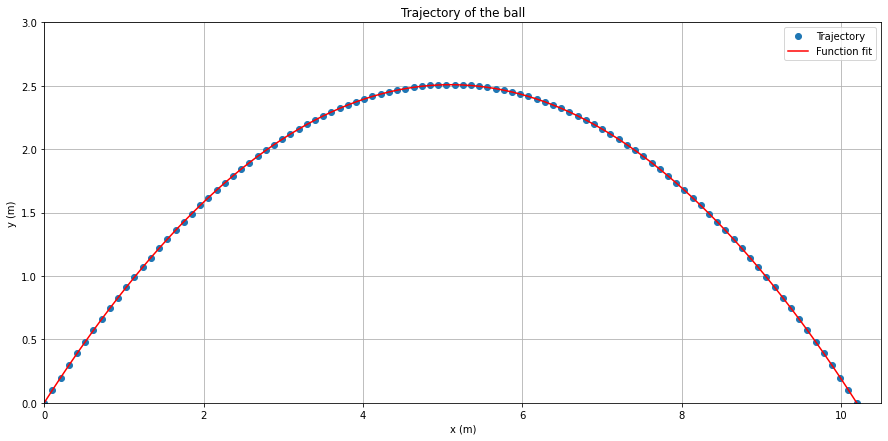

In [3]:
from scipy.optimize import curve_fit

# Parameters
g = 9.81
vi = 10
vy = vi*np.sin(alphamax)
vx = vi*np.cos(alphamax)

# Create functions for x and y as a function of t
t = np.linspace(0, 2*vy/g, 100)
x = vx*t
y = vy*t - 0.5*g*t**2

# Create function for parabolic trajectory
def fit(x, a, b):
    return a*x**2 + b*x

# Fit function using scipy.curve_fit
values, covariance = curve_fit(fit, x, y)
print(r"Function fit: %.2f x^2 + %.2f x" % (values[0], values[1]))

# Plot trajectory
plt.figure(figsize=[15,7])
plt.title("Trajectory of the ball")
plt.plot(x, y, 'o', label="Trajectory")
plt.plot(x, fit(x, values[0], values[1]), '-r', label="Function fit")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim([0,10.5])
plt.ylim([0,3])
plt.legend()
plt.grid()
plt.show()